# Elections Ad Spending Analysis in Argentina using Python(2023)

#### We collected data from Google ads about how much money was spent in formats like text, videos or image by political parties during Argentina elections 2023. In this article, we perform elections ad spending analysis - EDA - using Python (and how it impacted the voting patterns).

## Data Collection

We extract the dataset from Ads Transparency Center which format is in Google Sheet. We transform this and download it in a .csv format. 

We import the library pandas for dataframe manipulation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_ads = pd.read_csv("/home/andy/Descargas/ds_googleads.csv") #cambiar esto, quiero que me aparezca
                                                                #sólo el nombre de la carpeta
print("Shape of dataset: ", df_ads.shape)


Shape of dataset:  (5813, 22)


In [3]:
# Let's see the column names
df_ads.keys()

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Ad_Campaigns_List', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD',
       'First_Served_Timestamp', 'Last_Served_Timestamp', 'Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD', 'Spend_Range_Min_ARS',
       'Spend_Range_Max_ARS'],
      dtype='object')

In [8]:
# Let's check it out, for example, the first URL 
df_ads['Ad_URL'][0]

'https://adstransparency.google.com/advertiser/AR14823408713892626433/creative/CR10079170796300795905?political=&region=AR'

In [4]:
len(df_ads['Advertiser_ID'].unique())

145

In [5]:
fr = 'AR14823408713892626433'
df_ads[df_ads['Advertiser_ID'] == fr]

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"


In [6]:
gc = 'AR17825122736721100801'
df_ads[df_ads['Advertiser_ID'] == gc]

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"


In [7]:
df_ads.drop(['Ad_ID'],axis=1)

,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,300000-350000,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,2000000-2250000,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,100000-125000,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,6000-7000,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,3000-4000,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,300000-350000,...,2023-01-26T15:46:00Z,2023-01-27T13:53:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
5809,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,100000-125000,...,2023-01-26T23:16:00Z,2023-01-27T22:40:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","La Pampa,Argentina",NaN,"0,00","100,00","15.000,00","30.000,00"
5810,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,125000-150000,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
5811,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,25000-30000,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"


In [25]:
#show the first 5 rows
df_ads.head()

#levantar datos datetime,
#pd.to_datetime()

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"


### Data Cleaning & Data Preprocessing



In [26]:
#Let's drop NaN values from the dataframe like 
#Ad_Campaigns_List, Age_Trageting, Gender_Targeting,  Geo_Targeting_Excluded.

display(type(df_ads))  # This should print <class 'pandas.core.frame.DataFrame'>
display(df_ads.head())  # Print the first few rows to ensure it's a valid DataFrame

pandas.core.frame.DataFrame

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"


In [27]:
# Let's see summary statistics of relevant columns, for example: Spend_Range_Max_ARS:
print(df_ads['Spend_Range_Max_ARS'])

0       45.000,00
1       60.000,00
2       15.000,00
3       15.000,00
4       15.000,00
          ...    
5808    15.000,00
5809    30.000,00
5810    15.000,00
5811    15.000,00
5812    30.000,00
Name: Spend_Range_Max_ARS, Length: 5813, dtype: object


In [28]:
# We convert the data type:'Spend_Range_Max_ARS'  to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated data types
print(df_ads.dtypes)


ValueError: could not convert string to float: '45.000,00'

Given that the inner elements from column 'Spend_Range_Max_AR' has a typing error(?), we fix it in the following way: 

In [29]:
# Remove the thousand separator and replace the decimal separator
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Convert the column to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated DataFrame and data types
display(df_ads)
display(df_ads.dtypes)


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00",45000.0
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00",60000.0
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00",15000.0
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00",15000.0
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00",15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,CR01746279345447501825,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T15:46:00Z,2023-01-27T13:53:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00",15000.0
5809,CR06369083625454960641,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T23:16:00Z,2023-01-27T22:40:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","La Pampa,Argentina",NaN,"0,00","100,00","15.000,00",30000.0
5810,CR14634596316563374081,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00",15000.0
5811,CR03606406729039872001,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00",15000.0


Ad_ID                      object
Ad_URL                     object
Ad_Type                    object
Regions                    object
Advertiser_ID              object
Advertiser_Name            object
Ad_Campaigns_List         float64
Date_Range_Start           object
Date_Range_End             object
Num_of_Days                 int64
Impressions                object
Spend_USD                 float64
First_Served_Timestamp     object
Last_Served_Timestamp      object
Age_Targeting              object
Gender_Targeting           object
Geo_Targeting_Included     object
Geo_Targeting_Excluded     object
Spend_Range_Min_USD        object
Spend_Range_Max_USD        object
Spend_Range_Min_ARS        object
Spend_Range_Max_ARS       float64
dtype: object

In [30]:
# 
display(df_ads['Spend_Range_Max_ARS'].describe())

count    5.813000e+03
mean     3.287115e+04
std      9.486278e+04
min      1.500000e+04
25%      1.500000e+04
50%      1.500000e+04
75%      1.500000e+04
max      3.000000e+06
Name: Spend_Range_Max_ARS, dtype: float64

(0.0, 100000.0)

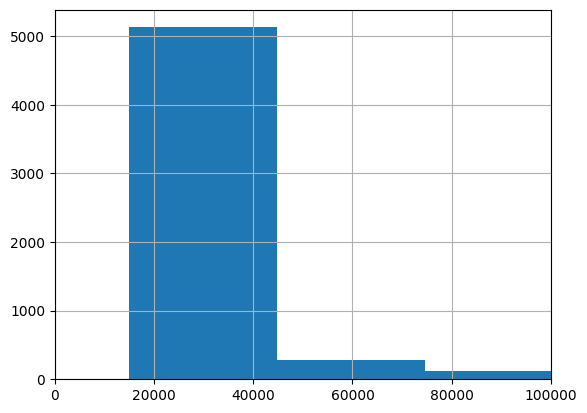

In [37]:
df_ads['Spend_Range_Max_ARS'].hist(bins=100)

plt.xlim(0, 100000)

In [38]:
#We calculate the mode (most frequent value) of the column 'Spend_Range_Max_ARS':
df_ads['Spend_Range_Max_ARS'].value_counts()

Spend_Range_Max_ARS
15000.0      4730
30000.0       400
45000.0       166
60000.0       112
75000.0        82
200000.0       43
250000.0       39
120000.0       38
90000.0        35
105000.0       33
135000.0       29
150000.0       21
350000.0       17
300000.0       14
450000.0        9
400000.0        9
700000.0        8
500000.0        6
900000.0        6
600000.0        5
1500000.0       4
800000.0        3
3000000.0       2
1000000.0       2
Name: count, dtype: int64